# Wedding Game Data Processing

Hi! I see you've found my little nerd den!

What you'll find down here is the data I put out for my wedding processed and visualised.

As I'm writing this I don't know what exactly is the processing, but it will be fun, so hop along for the ride!

## 0) Importing stuff

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
fr = pd.read_csv('FR.csv', parse_dates=['Horodateur'], dtype=str)
print(fr.dtypes)
fr.head()

Horodateur                                                              datetime64[ns]
Quelles langues parles-tu? (Cocher toutes les langues que tu parles)            object
Genre                                                                           object
Age (en ans)                                                                    object
Taille (en cm)                                                                  object
Poids (en Kg)                                                                   object
Quelle est la distance tu vas parcourir pour rejoindre le mariage?              object
Comment qualifies-tu ta relation avec: [Abed Alrahman]                          object
Comment qualifies-tu ta relation avec: [Dania]                                  object
dtype: object


,Horodateur,Quelles langues parles-tu? (Cocher toutes les langues que tu parles),Genre,Age (en ans),Taille (en cm),Poids (en Kg),Quelle est la distance tu vas parcourir pour rejoindre le mariage?,Comment qualifies-tu ta relation avec: [Abed Alrahman],Comment qualifies-tu ta relation avec: [Dania]
0,2021-06-16 13:07:19,"Anglais, Français",Mâle,24,193,70,201+ Km,Ami proche,Ami
1,2021-06-16 13:09:30,"Français, Arabe",Femelle,25,170,65,201+ Km,Ami,Ami
2,2021-06-16 14:12:47,"Anglais, Français, Arabe",Mâle,23,172,75,201+ Km,Ami proche,Qui?
3,2021-06-16 20:40:55,"Anglais, Français, Arabe, chinois, allemand",Mâle,48,180,70,101-200 Km,Famille,Connaissance
4,2021-06-17 23:15:18,"Anglais, Français",Mâle,26,170,60,201+ Km,Qui?,Qui?


In [3]:
en = pd.read_csv('EN.csv', parse_dates=['Horodateur'], dtype=str)
print(en.dtypes)
en.head()

Horodateur                                                       datetime64[ns]
What language do you speak? (Check all that apply)                       object
Gender?                                                                  object
Age (in years)                                                           object
Height (in cm)                                                           object
Weight (in kg)                                                           object
How far would you have to come to join the wedding?                      object
How would you qualify your relationship with: [Abed Alrahman]            object
How would you qualify your relationship with: [Dania]                    object
dtype: object


,Horodateur,What language do you speak? (Check all that apply),Gender?,Age (in years),Height (in cm),Weight (in kg),How far would you have to come to join the wedding?,How would you qualify your relationship with: [Abed Alrahman],How would you qualify your relationship with: [Dania]
0,2021-12-06 08:27:19,Arabic,Male,53,176,110,201+ Km,Family,Family
1,2021-12-06 09:03:43,Arabic,Male,11,143,32,201+ Km,Family,Family
2,2021-12-06 10:21:15,French,Female,26,160,69,1-10 Km,Who?,Family
3,2021-12-06 10:26:56,"English, French",Female,26,163,56,11-30 Km,Who?,Close Friend
4,2021-12-06 13:18:53,"English, French, Arabic",Female,26,170,55,1-10 Km,Who?,Close Friend


In [4]:
ar = pd.read_csv('AR.csv', parse_dates=['Horodateur'], dtype=str)
print(ar.dtypes)
ar.head()

Horodateur                                        datetime64[ns]
أي اللغات تتكلم؟ (اختر كل اللغات التي تتكلمها)            object
الجنس؟                                                    object
العمر (بالسنة)                                            object
الطول (بالسنتيمتر)                                        object
الوزن (بالكيلوجرام)                                       object
ما هي المسافة التي ستقطعها لحضور الزفاف؟                  object
كيف تصف علاقتك بـ: [عبد الرحمن]                           object
كيف تصف علاقتك بـ: [دانية]                                object
dtype: object


,Horodateur,أي اللغات تتكلم؟ (اختر كل اللغات التي تتكلمها),الجنس؟,العمر (بالسنة),الطول (بالسنتيمتر),الوزن (بالكيلوجرام),ما هي المسافة التي ستقطعها لحضور الزفاف؟,كيف تصف علاقتك بـ: [عبد الرحمن],كيف تصف علاقتك بـ: [دانية]
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55,166,66,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54,167,82,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36,10000,10000,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24,176,ما حزرت,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85,156,65,201+ Km,من العائلة,من العائلة


## 1) Cleaning and Preprocessing

Map all column names to english to process them together

In [5]:
std_cols = ['timestamp', 'lang', 'gender', 'age', 'height', 'weight', 'distance', 'relation_abed', 'relation_dania']
num_cols = ['age', 'height', 'weight']
en.columns = std_cols
fr.columns = std_cols
ar.columns = std_cols
ar.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55,166,66,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54,167,82,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36,10000,10000,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24,176,ما حزرت,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85,156,65,201+ Km,من العائلة,من العائلة


### 1.1) Clean Numeric Columns

In [6]:
def clean_nums(x: str):
    if x.isnumeric():
        return x
    else:
        nums = re.findall(r'[0-9]+', x)
        if nums:
            return nums[0]
        else:
            return np.nan

In [7]:
en[num_cols] = en[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(en.dtypes)
en.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                        int64
height                     int64
weight                     int64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-12-06 08:27:19,Arabic,Male,53,176,110,201+ Km,Family,Family
1,2021-12-06 09:03:43,Arabic,Male,11,143,32,201+ Km,Family,Family
2,2021-12-06 10:21:15,French,Female,26,160,69,1-10 Km,Who?,Family
3,2021-12-06 10:26:56,"English, French",Female,26,163,56,11-30 Km,Who?,Close Friend
4,2021-12-06 13:18:53,"English, French, Arabic",Female,26,170,55,1-10 Km,Who?,Close Friend


In [8]:
fr[num_cols] = fr[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(fr.dtypes)
fr.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                      float64
height                   float64
weight                   float64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-16 13:07:19,"Anglais, Français",Mâle,24.0,193.0,70.0,201+ Km,Ami proche,Ami
1,2021-06-16 13:09:30,"Français, Arabe",Femelle,25.0,170.0,65.0,201+ Km,Ami,Ami
2,2021-06-16 14:12:47,"Anglais, Français, Arabe",Mâle,23.0,172.0,75.0,201+ Km,Ami proche,Qui?
3,2021-06-16 20:40:55,"Anglais, Français, Arabe, chinois, allemand",Mâle,48.0,180.0,70.0,101-200 Km,Famille,Connaissance
4,2021-06-17 23:15:18,"Anglais, Français",Mâle,26.0,170.0,60.0,201+ Km,Qui?,Qui?


In [9]:
ar[num_cols] = ar[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(ar.dtypes)
ar.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                      float64
height                   float64
weight                   float64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55.0,166.0,66.0,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54.0,167.0,82.0,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36.0,10000.0,10000.0,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24.0,176.0,NaN,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85.0,156.0,65.0,201+ Km,من العائلة,من العائلة


### 1.2) Map all Values to Uniform Tokens
Starting with language values

In [10]:
ar_dict = {'العربية':'ar',
           'الانجليزية':'en',
           'الفرنسية':'fr',
           'الماني':'de',
           'الالمانية':'de',
           'الألمانية':'de',
           'Italiano':'it'}

en_dict = {'Arabic':'ar',
           'English':'en',
           'French':'fr'}

fr_dict = {'Arabe':'ar',
           'Anglais':'en',
           'Français':'fr',
           'turc':'tr',
           'chinois':'cn',
           'allemand':'de',
           'Allemand':'de',
           'Farsi':'fa'}

def clean_lang(x: str, user_lang='ar'):
    langs = pd.Series([s.strip() for s in x.split(',')])
    if user_lang == 'fr':
        mapped = langs.map(fr_dict)
        return mapped.values.tolist()
    elif user_lang == 'en':
        mapped = langs.map(en_dict)
        return mapped.values.tolist()
    else:
        mapped = langs.map(ar_dict)
        return mapped.values.tolist()

In [11]:
en['lang'] = en.lang.apply(clean_lang, user_lang='en')
en.lang

0            [ar]
1            [ar]
2            [fr]
3        [en, fr]
4    [en, fr, ar]
5    [en, fr, ar]
6            [ar]
7            [fr]
Name: lang, dtype: object

In [12]:
fr['lang'] = fr.lang.apply(clean_lang, user_lang='fr')
fr.lang

0                 [en, fr]
1                 [fr, ar]
2             [en, fr, ar]
3     [en, fr, ar, cn, de]
4                 [en, fr]
5                     [fr]
6             [en, fr, ar]
7                     [fr]
8                     [tr]
9             [en, fr, ar]
10        [en, fr, de, ar]
11        [en, fr, ar, de]
12            [en, de, fa]
13                [en, fr]
14                [fr, ar]
15            [en, fr, ar]
16            [en, fr, ar]
17            [en, fr, ar]
18            [en, fr, ar]
19                [en, fr]
Name: lang, dtype: object

In [13]:
ar['lang'] = ar.lang.apply(clean_lang, user_lang='ar')
ar.lang

0     [en, fr, ar]
1             [ar]
2         [en, ar]
3     [en, ar, de]
4             [ar]
5         [ar, it]
6         [en, ar]
7         [en, ar]
8         [fr, ar]
9         [fr, ar]
10        [en, ar]
11    [en, fr, ar]
12        [fr, ar]
13        [fr, ar]
14        [fr, ar]
15    [en, ar, de]
16    [en, ar, de]
17        [fr, ar]
18    [en, fr, ar]
19        [en, ar]
20    [en, fr, ar]
21            [ar]
22    [en, fr, ar]
23    [en, fr, ar]
24            [ar]
25            [ar]
Name: lang, dtype: object

The rest should be easier since we're just using categorical dummies

In [14]:
en['gender'] = en.gender.map({'Male':'M', 'Female':'F'})
fr['gender'] = fr.gender.map({'Mâle':'M', 'Femelle':'F'})
ar['gender'] = ar.gender.map({'ذكر':'M', 'أنثى':'F'})
ar.gender

0     F
1     M
2     M
3     M
4     F
5     F
6     M
7     F
8     F
9     F
10    M
11    M
12    F
13    F
14    M
15    M
16    M
17    F
18    F
19    F
20    F
21    F
22    F
23    F
24    F
25    F
Name: gender, dtype: object

In [15]:
discrete_cols = ['relation_abed', 'relation_dania', 'distance']
ar_rel_map = {'من هذا؟':0,
              'معرفة':1,
              'صديق':2,
              'صديق مقرب':3,
              'من العائلة':4}

en_rel_map = {'Who?':0,
              'Acquaintance':1,
              'Friend':2,
              'Close Friend':3,
              'Family':4}

fr_rel_map = {'Qui?':0,
              'Connaissance':1,
              'Ami':2,
              'Ami proche':3,
              'Famille':4}

distance_map = {'1-10 Km':0,
                '11-30 Km':1,
                '31-50 Km':2,
                '51-100 Km':3,
                '101-200 Km':4,
                '201+ Km':5}

In [16]:
ar['relation_abed_num'] = ar.relation_abed.map(ar_rel_map)
ar['relation_dania_num'] = ar.relation_dania.map(ar_rel_map)
ar['distance_num'] = ar.distance.map(distance_map)

ar.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
0,2021-06-15 22:53:42,"[en, fr, ar]",F,55.0,166.0,66.0,201+ Km,من العائلة,من العائلة,4,4,5
1,2021-06-15 23:00:19,[ar],M,54.0,167.0,82.0,201+ Km,من العائلة,من العائلة,4,4,5
2,2021-06-16 14:04:03,"[en, ar]",M,36.0,10000.0,10000.0,201+ Km,من العائلة,من العائلة,4,4,5
3,2021-06-16 14:20:32,"[en, ar, de]",M,24.0,176.0,NaN,201+ Km,من هذا؟,معرفة,0,1,5
4,2021-06-16 19:55:40,[ar],F,85.0,156.0,65.0,201+ Km,من العائلة,من العائلة,4,4,5


In [17]:
en['relation_abed_num'] = en.relation_abed.map(en_rel_map)
en['relation_dania_num'] = en.relation_dania.map(en_rel_map)
en['distance_num'] = en.distance.map(distance_map)

fr['relation_abed_num'] = fr.relation_abed.map(fr_rel_map)
fr['relation_dania_num'] = fr.relation_dania.map(fr_rel_map)
fr['distance_num'] = fr.distance.map(distance_map)

fr.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
0,2021-06-16 13:07:19,"[en, fr]",M,24.0,193.0,70.0,201+ Km,Ami proche,Ami,3,2,5
1,2021-06-16 13:09:30,"[fr, ar]",F,25.0,170.0,65.0,201+ Km,Ami,Ami,2,2,5
2,2021-06-16 14:12:47,"[en, fr, ar]",M,23.0,172.0,75.0,201+ Km,Ami proche,Qui?,3,0,5
3,2021-06-16 20:40:55,"[en, fr, ar, cn, de]",M,48.0,180.0,70.0,101-200 Km,Famille,Connaissance,4,1,4
4,2021-06-17 23:15:18,"[en, fr]",M,26.0,170.0,60.0,201+ Km,Qui?,Qui?,0,0,5


## 1.3) MERGE

In [18]:
df = pd.concat([en, fr, ar], axis=0).reset_index().drop('index', axis=1)
print(df.shape)
df.head()

(54, 12)


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
0,2021-12-06 08:27:19,[ar],M,53.0,176.0,110.0,201+ Km,Family,Family,4,4,5
1,2021-12-06 09:03:43,[ar],M,11.0,143.0,32.0,201+ Km,Family,Family,4,4,5
2,2021-12-06 10:21:15,[fr],F,26.0,160.0,69.0,1-10 Km,Who?,Family,0,4,0
3,2021-12-06 10:26:56,"[en, fr]",F,26.0,163.0,56.0,11-30 Km,Who?,Close Friend,0,3,1
4,2021-12-06 13:18:53,"[en, fr, ar]",F,26.0,170.0,55.0,1-10 Km,Who?,Close Friend,0,3,0


## 2) Processing
### 2.1) Participation Rate

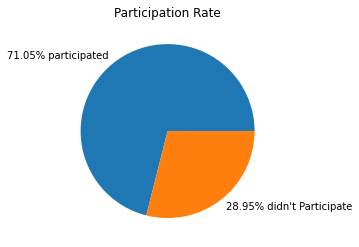

In [19]:
plt.pie(x=[df.shape[0], 76-df.shape[0]], labels=[f'{100*df.shape[0]/76:.2f}% participated', f'{100 * (76 - df.shape[0]) / 76:.2f}% didn\'t Participate'])
plt.title('Participation Rate')
plt.savefig('figures/participation.pdf')
plt.show()

### 2.2) Language Distribution

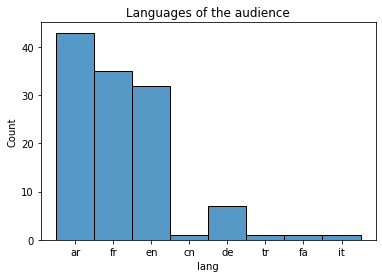

In [20]:
sns.histplot(data=df.explode('lang'),x='lang')
plt.title('Languages of the audience')
plt.savefig('figures/langs.pdf')
plt.show()

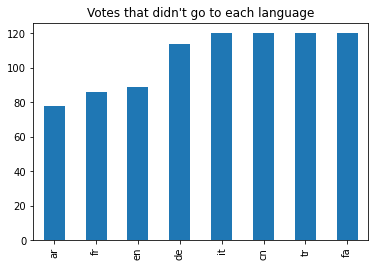

In [21]:
nb_votes = df.lang.explode().shape[0]
(nb_votes - df.lang.explode().value_counts()).plot.bar(title='Votes that didn\'t go to each language' )
plt.savefig('figures/langs_neg.pdf')
plt.show()

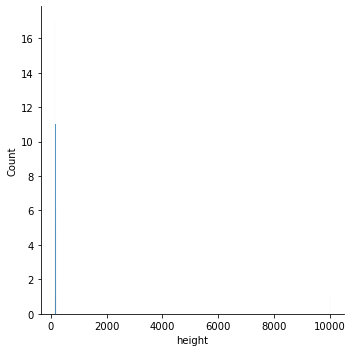

In [22]:
#fig, axs = plt.subplots(3, 1)
sns.displot(data=df, x='height')
plt.savefig('figures/height_scuffed.pdf')
plt.show()

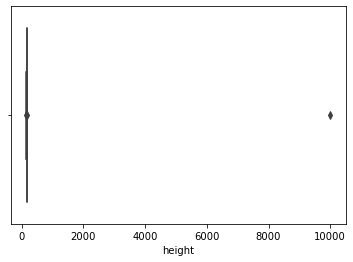

In [23]:
sns.boxplot(data=df, x='height')
plt.show()

Some funny guy, let's chop him down

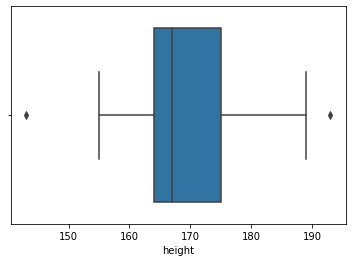

In [24]:
df.loc[df['height'] > 250, num_cols] = df[num_cols].mean(0)
sns.boxplot(data=df, x='height')
plt.show()

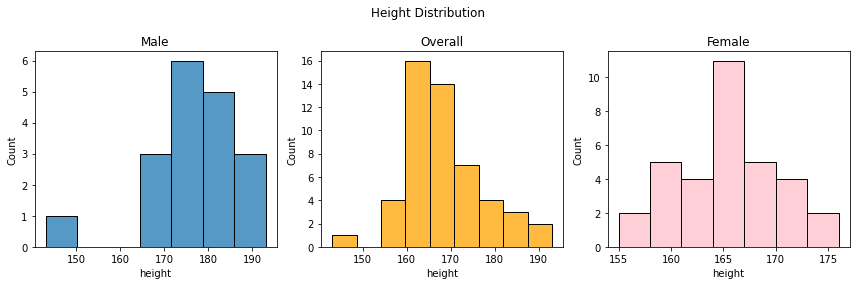

In [93]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
fig.suptitle('Height Distribution')
sns.histplot(data=df, x='height', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='height',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='height', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/height.pdf')
plt.show()

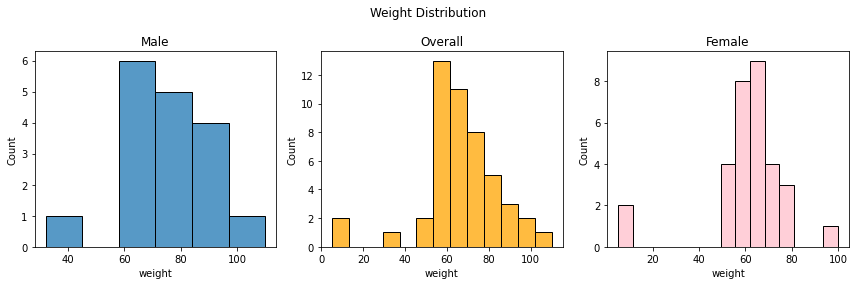

In [94]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
fig.suptitle('Weight Distribution')
sns.histplot(data=df, x='weight', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='weight',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='weight', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/weight.pdf')
plt.show()

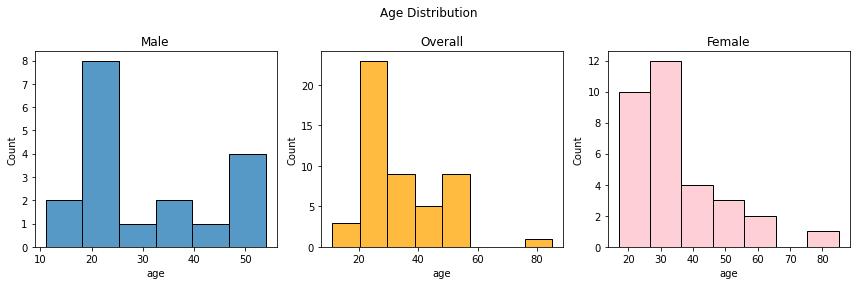

In [98]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
fig.suptitle('Age Distribution')
sns.histplot(data=df, x='age', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='age',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='age', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/age.pdf')
plt.show()

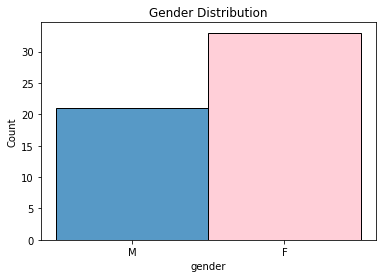

In [28]:
fig, ax = plt.subplots(1,1)
sns.histplot(data=df[df.gender == 'M'], x='gender', ax=ax)
sns.histplot(data=df[df.gender == 'F'], x='gender', ax=ax, color='pink')
plt.title('Gender Distribution')
plt.show()

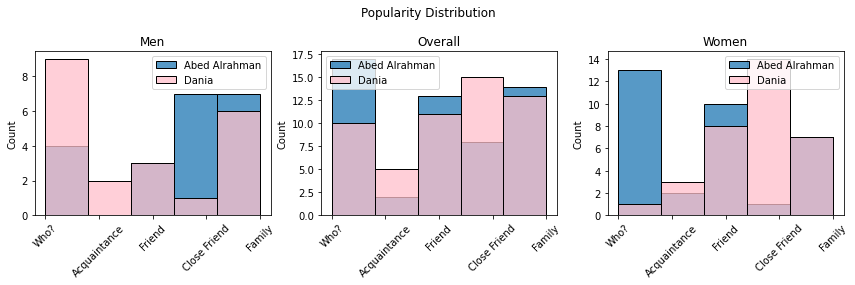

In [108]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
fig.suptitle('Popularity Distribution')
sns.histplot(data=df, x='relation_abed_num', ax=axs[1], bins=5)
sns.histplot(data=df, x='relation_dania_num', ax=axs[1], color='pink', bins=5)
axs[1].set_title('Overall')
axs[1].set_xlabel('')
axs[1].set_xticks(range(5))
axs[1].set_xticklabels(en_rel_map.keys(), )
axs[1].legend(['Abed Alrahman', 'Dania'])
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)

sns.histplot(data=df[df.gender == 'M'], x='relation_abed_num', ax=axs[0], bins=5)
sns.histplot(data=df[df.gender == 'M'], x='relation_dania_num', ax=axs[0], color='pink', bins=5)
axs[0].set_title('Men')
axs[0].set_xlabel('')
axs[0].set_xticks(range(5))
axs[0].set_xticklabels(en_rel_map.keys(), )
axs[0].legend(['Abed Alrahman', 'Dania'])
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)

sns.histplot(data=df[df.gender =='F'], x='relation_abed_num', ax=axs[2], bins=5)
sns.histplot(data=df[df.gender == 'F'], x='relation_dania_num', ax=axs[2], color='pink', bins=5)
axs[2].set_title('Women')
axs[2].set_xlabel('')
axs[2].set_xticks(range(5))
axs[2].set_xticklabels(en_rel_map.keys(), )
axs[2].legend(['Abed Alrahman', 'Dania'])
for tick in axs[2].get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.savefig('figures/popularity.pdf')
plt.show()

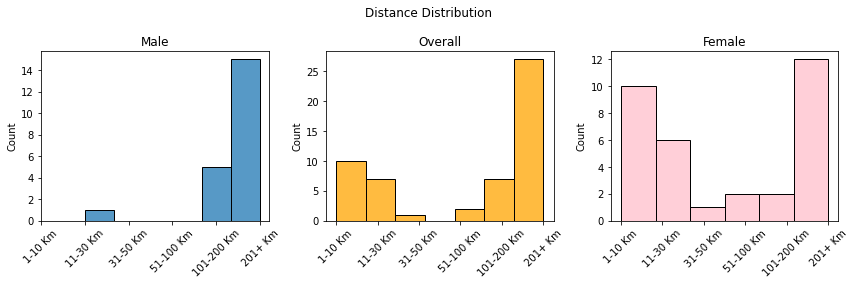

In [106]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
fig.suptitle('Distance Distribution')
sns.histplot(data=df, x='distance_num', ax=axs[1], color='orange', )
axs[1].set_title('Overall')
axs[1].set_xlabel('')
axs[1].set_xticks(range(6))
axs[1].set_xticklabels(distance_map.keys(), )
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
sns.histplot(data=df[df.gender=='M'],x='distance_num',  ax=axs[0], bins=6)
axs[0].set_title('Male')
axs[0].set_xlabel('')
axs[0].set_xticks(range(6))
axs[0].set_xticklabels(distance_map.keys())
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
sns.histplot(data=df[df.gender=='F'], x='distance_num', ax=axs[2], color='pink', bins=6)
axs[2].set_title('Female')
axs[2].set_xlabel('')
axs[2].set_xticks(range(6))
axs[2].set_xticklabels(distance_map.keys())
for tick in axs[2].get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.savefig('figures/distance.pdf')
plt.show()

## 3) Calculating the average person
Here's a bad way to do it, by not recognising that data is missing nor that data has different scales

In [42]:
mean_df = df.dropna().mean(0, numeric_only=True)
num_cols = mean_df.keys()
mean_df

age                    34.583333
height                168.916667
weight                 66.250000
relation_abed_num       2.020833
relation_dania_num      2.312500
distance_num            3.145833
dtype: float64

In [43]:
df[df.gender=='M'].dropna().mean(0, numeric_only=True)

age                    31.941176
height                176.352941
weight                 75.764706
relation_abed_num       2.823529
relation_dania_num      1.588235
distance_num            4.529412
dtype: float64

In [44]:
df[df.gender=='F'].dropna().mean(0, numeric_only=True)

age                    36.032258
height                164.838710
weight                 61.032258
relation_abed_num       1.580645
relation_dania_num      2.709677
distance_num            2.387097
dtype: float64

Note That that is the average point in Eucledian space without normalisation.

Using that average and calculating the closet point gives us the following results:


In [67]:
dist_to_avg = np.sqrt((df.dropna()[num_cols]- df.mean(0, numeric_only=True)).pow(2).sum(1))
min_idx = dist_to_avg.idxmin()
df.loc[min_idx]

timestamp             2021-06-30 21:17:28
lang                         [en, fr, ar]
gender                                  F
age                                  35.0
height                              165.0
weight                               65.0
distance                         11-30 Km
relation_abed                     من هذا؟
relation_dania                  صديق مقرب
relation_abed_num                       0
relation_dania_num                      3
distance_num                            1
Name: 48, dtype: object

In [68]:
reduced = df[df.gender == 'F']
dist_to_avg = np.sqrt((reduced.dropna()[num_cols]- reduced.mean(0, numeric_only=True)).pow(2).sum(1))
min_idx = dist_to_avg.idxmin()
df.loc[min_idx]

timestamp             2021-08-07 00:38:25
lang                         [en, fr, ar]
gender                                  F
age                                  35.0
height                              165.0
weight                               61.0
distance                          1-10 Km
relation_abed                        صديق
relation_dania                  صديق مقرب
relation_abed_num                       2
relation_dania_num                      3
distance_num                            0
Name: 51, dtype: object

In [69]:
reduced = df[df.gender == 'M']
dist_to_avg = np.sqrt((reduced.dropna()[num_cols]- reduced.mean(0, numeric_only=True)).pow(2).sum(1))
min_idx = dist_to_avg.idxmin()
df.loc[min_idx]

timestamp             2021-06-26 22:48:58
lang                         [en, ar, de]
gender                                  M
age                                  25.0
height                              181.0
weight                               81.0
distance                          201+ Km
relation_abed                   صديق مقرب
relation_dania                    من هذا؟
relation_abed_num                       3
relation_dania_num                      0
distance_num                            5
Name: 44, dtype: object

Note how height dominates the distance calculation as its scale allows it to have bigger values.

A solution is to normalise the data in order to make it have the same scale.

In [59]:
normalised = StandardScaler().fit_transform(df.dropna()[num_cols])
dist_to_avg = np.sqrt(((normalised- normalised.mean(0))**2).sum(1))
min_idx = pd.Series(dist_to_avg).sort_values(ascending=True)[:5].keys()
df.loc[min_idx]

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
36,2021-06-19 02:57:59,"[fr, ar]",F,42.0,164.0,65.0,201+ Km,صديق,معرفة,2,1,5
9,2021-06-16 13:09:30,"[fr, ar]",F,25.0,170.0,65.0,201+ Km,Ami,Ami,2,2,5
16,2021-06-21 10:53:49,[tr],F,30.0,168.0,60.0,11-30 Km,Ami,Ami proche,2,3,1
43,2021-06-26 22:48:49,"[en, ar, de]",M,25.0,170.0,82.0,201+ Km,صديق مقرب,من هذا؟,3,0,5
22,2021-06-27 20:17:22,"[fr, ar]",F,25.0,158.0,60.0,1-10 Km,Connaissance,Ami proche,1,3,0


In [62]:
reduced = df[df.gender == 'F'].dropna()
normalised = StandardScaler().fit_transform(reduced[num_cols])
dist_to_avg = np.sqrt(((normalised- normalised.mean(0))**2).sum(1))
min_idx = pd.Series(dist_to_avg).sort_values(ascending=True)[:5].keys()
reduced.iloc[min_idx]

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
16,2021-06-21 10:53:49,[tr],F,30.0,168.0,60.0,11-30 Km,Ami,Ami proche,2,3,1
51,2021-08-07 00:38:25,"[en, fr, ar]",F,35.0,165.0,61.0,1-10 Km,صديق,صديق مقرب,2,3,0
48,2021-06-30 21:17:28,"[en, fr, ar]",F,35.0,165.0,65.0,11-30 Km,من هذا؟,صديق مقرب,0,3,1
49,2021-01-07 19:40:14,[ar],F,44.0,167.0,75.0,11-30 Km,صديق,صديق,2,2,1
35,2021-06-17 07:13:43,"[en, ar]",F,48.0,161.0,54.0,51-100 Km,صديق,صديق,2,2,3


In [63]:
reduced = df[df.gender == 'M'].dropna()
normalised = StandardScaler().fit_transform(reduced[num_cols])
dist_to_avg = np.sqrt(((normalised- normalised.mean(0))**2).sum(1))
min_idx = pd.Series(dist_to_avg).sort_values(ascending=True)[:5].keys()
reduced.iloc[min_idx]

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
44,2021-06-26 22:48:58,"[en, ar, de]",M,25.0,181.0,81.0,201+ Km,صديق مقرب,من هذا؟,3,0,5
10,2021-06-16 14:12:47,"[en, fr, ar]",M,23.0,172.0,75.0,201+ Km,Ami proche,Qui?,3,0,5
43,2021-06-26 22:48:49,"[en, ar, de]",M,25.0,170.0,82.0,201+ Km,صديق مقرب,من هذا؟,3,0,5
42,2021-06-26 18:36:16,"[fr, ar]",M,24.0,173.0,60.0,101-200 Km,صديق,صديق,2,2,4
18,2021-06-22 17:49:25,"[en, fr, de, ar]",M,23.0,182.0,64.0,101-200 Km,Ami,Qui?,2,0,4


# T-Shirt Design


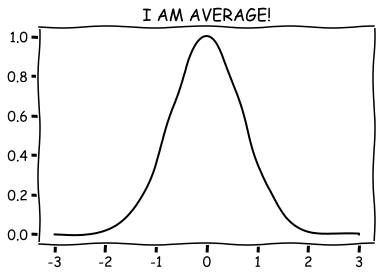

In [121]:
with plt.xkcd():
    xs = np.linspace(-3, 3, 2000)
    plt.plot(xs, np.exp(-xs**2), c='k')
    plt.title('I AM AVERAGE!')
plt.savefig('figures/T-shirt.pdf')
plt.show()